# Summarize Results with Plots

In [173]:
# Uncomment below line if you are just trying to run this notebook and have not done a full installation of this project
# !pip install pandas==2.2.3 matplotlib==3.9.3 seaborn==0.13.2 tiktoken==0.8.0 numpy==2.0.1

#### Load libraries

In [174]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken

#### Set seaborn plotting settings

In [175]:
sns.set_palette("Greys")
sns.set_context("paper")
sns.set_style("whitegrid")

## Load results dataframe

#### Set up mappings and types for neater presentation and easier sorting of results

In [176]:
path_to_results = "../Data/3-Results/marked_results-compiled.csv"

mapping_prompt_names = {
    'v0_baseline': "NoContext",
    'v2a_baseline_and_provide_readme': "README",
    'v2_describe_task_and_provide_readme': "README+BugDescriptions",
    'v3a_describe_task_and_provide_readme_plus_mock_verified_sample': "AllContextExceptAssets",
    'v5_describe_task_and_provide_readme_plus_mock_verified_sample_plus_assets': "AllContext"
}
# Drop some strategies -- these results aren't very meaningful -- not useful for paper
list_names_strategies_drop = [
    "v1_describe_task",
    "v3_describe_task_and_provide_readme_plus_verified_sample",
    "v4_describe_task_and_provide_readme_plus_assets"
]
# Drop the 0th "run", from ~August 16, 2024. Despite specifying the same model snapshot, 
# it is hard to ensure/know we actually used the same model under-the-hood months apart 
# (runs 1,2,3,4 are from the same day, 6th October 2024)
list_numbers_of_runs_drop = [
    0
]
# for sorting
type_prompt_strategy = pd.CategoricalDtype(categories=['NoContext', 'README', 'README+BugDescriptions', 'AllContextExceptAssets', 'AllContext'], ordered=True)
type_sample = pd.CategoricalDtype(categories=['clean', 'bug_state', 'bug_rendering', 'bug_layout', 'bug_appearance'], ordered=True)
type_app_name = pd.CategoricalDtype(
    categories=[
        "Aidymouse-Hexfriend",
        "aldy-san-zero-neko",
        "chase-manning-react-photo-studio",
        "coderetreat-coderetreat.org",
        "dimforge-rapier.js",
        "equinor-esv-intersection",
        "getkey-ble",
        "ha-shine-wasm-tetris",
        "higlass-higlass",
        "mehanix-arcada",
        "MichaelMakesGames-reflector",
        "ourcade-ecs-dependency-injection",
        "p5aholic-playground",
        "PrefectHQ-graphs",
        "solaris-games-solaris",
        "starwards-starwards",
        "tulustul-ants-sandbox",
        "uia4w-uia-wafermap",
        "VoiceSpaceUnder5-VoiceSpace",
        "Zikoat-infinite-minesweeper"
    ],
    ordered=True
)

#### Function for using in pd.Series.map(lambda x: ...)

In [177]:
def map_true_false_to_one_zero(input_to_check):
    output_val = None

    if input_to_check == True:
        output_val = 1
        
    elif input_to_check == False:
        output_val = 0

    return output_val

#### Load, slice, and clean DataFrame

In [178]:
df_results_compiled = pd.read_csv(path_to_results, index_col=None)

for name_of_strategy_to_drop in list_names_strategies_drop:
    df_results_compiled = df_results_compiled[df_results_compiled["TextPromptStrategy"] != name_of_strategy_to_drop].reset_index(drop=True)

for number_of_run_to_drop in list_numbers_of_runs_drop:
    df_results_compiled = df_results_compiled[df_results_compiled["IntRunNumber"] != number_of_run_to_drop].reset_index(drop=True)

df_results_compiled["TextPromptStrategy"] = df_results_compiled["TextPromptStrategy"].map(lambda x: mapping_prompt_names[x])

df_results_compiled['BoolScreenshotContainsVisualBug'] = df_results_compiled['BoolScreenshotContainsVisualBug'].apply(map_true_false_to_one_zero)
df_results_compiled['BoolDidDetectVisualBug'] = df_results_compiled['BoolDidDetectVisualBug'].apply(map_true_false_to_one_zero)
df_results_compiled['BoolDescriptionIsCorrect'] = df_results_compiled['BoolDescriptionIsCorrect'].apply(map_true_false_to_one_zero)

df_results_compiled['IntRunNumber'] = df_results_compiled['IntRunNumber'].astype(int)
df_results_compiled['TextPromptStrategy'] = df_results_compiled['TextPromptStrategy'].astype(type_prompt_strategy)
df_results_compiled['TextAppName'] = df_results_compiled['TextAppName'].astype(type_app_name)
df_results_compiled['TextSampleName'] = df_results_compiled['TextSampleName'].astype(type_sample)
df_results_compiled['BoolScreenshotContainsVisualBug'] = df_results_compiled['BoolScreenshotContainsVisualBug'].astype(int)
df_results_compiled['BoolDidDetectVisualBug'] = df_results_compiled['BoolDidDetectVisualBug'].astype(int)
df_results_compiled['BoolDescriptionIsCorrect'] = df_results_compiled['BoolDescriptionIsCorrect'].astype(int)

df_results_compiled = df_results_compiled[["TextPromptStrategy", "TextAppName", "TextSampleName", "IntRunNumber", "BoolScreenshotContainsVisualBug", "BoolDidDetectVisualBug", "BoolDescriptionIsCorrect"]]
df_results_compiled = df_results_compiled.sort_values(by=["TextPromptStrategy", "TextAppName", "TextSampleName", "IntRunNumber"]).reset_index(drop=True)

df_results_compiled

,TextPromptStrategy,TextAppName,TextSampleName,IntRunNumber,BoolScreenshotContainsVisualBug,BoolDidDetectVisualBug,BoolDescriptionIsCorrect
0,NoContext,Aidymouse-Hexfriend,clean,1,0,1,0
1,NoContext,Aidymouse-Hexfriend,clean,2,0,1,0
2,NoContext,Aidymouse-Hexfriend,clean,3,0,1,0
3,NoContext,Aidymouse-Hexfriend,clean,4,0,0,1
4,NoContext,Aidymouse-Hexfriend,bug_state,1,1,0,0
...,...,...,...,...,...,...,...
1815,AllContext,Zikoat-infinite-minesweeper,bug_layout,4,1,0,0
1816,AllContext,Zikoat-infinite-minesweeper,bug_appearance,1,1,0,0
1817,AllContext,Zikoat-infinite-minesweeper,bug_appearance,2,1,0,0
1818,AllContext,Zikoat-infinite-minesweeper,bug_appearance,3,1,0,0


#### Create lists of unique values from DataFrame

In [179]:
run_numbers = df_results_compiled['IntRunNumber'].unique().tolist()
prompt_strategies = df_results_compiled['TextPromptStrategy'].unique().tolist()
app_names = df_results_compiled['TextAppName'].unique().tolist()
sample_names = df_results_compiled['TextSampleName'].unique().tolist()

In [180]:
run_numbers

[1, 2, 3, 4]

In [181]:
prompt_strategies

['NoContext',
 'README',
 'README+BugDescriptions',
 'AllContextExceptAssets',
 'AllContext']

In [182]:
app_names

['Aidymouse-Hexfriend',
 'aldy-san-zero-neko',
 'chase-manning-react-photo-studio',
 'coderetreat-coderetreat.org',
 'dimforge-rapier.js',
 'equinor-esv-intersection',
 'getkey-ble',
 'ha-shine-wasm-tetris',
 'higlass-higlass',
 'mehanix-arcada',
 'MichaelMakesGames-reflector',
 'ourcade-ecs-dependency-injection',
 'p5aholic-playground',
 'PrefectHQ-graphs',
 'solaris-games-solaris',
 'starwards-starwards',
 'tulustul-ants-sandbox',
 'uia4w-uia-wafermap',
 'VoiceSpaceUnder5-VoiceSpace',
 'Zikoat-infinite-minesweeper']

In [183]:
sample_names

['clean', 'bug_state', 'bug_rendering', 'bug_layout', 'bug_appearance']

## Define functions for use in notebook

#### Metrics function definitions

In [184]:
def get_true_positives(df):
    # (Does contain a bug) AND (did detect bug) AND (description is correct)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 1) & (df["BoolDescriptionIsCorrect"] == 1)]


def get_false_positives(df):
    # (Does not contain a bug) AND (did detect a bug)
    # OR
    # (Does contain a bug) AND (description is incorrect)
    return df.loc[
        ((df["BoolScreenshotContainsVisualBug"] == 0) & (df["BoolDidDetectVisualBug"] == 1))
        |
        ((df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 1) & (df["BoolDescriptionIsCorrect"] == 0))
    ]


def get_true_negatives(df):
    # (Does not contain a bug) AND (did not detect a bug)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 0) & (df["BoolDidDetectVisualBug"] == 0)]


def get_false_negatives(df):
    # (Does contain a bug) AND (did not detect a bug)
    return df.loc[(df["BoolScreenshotContainsVisualBug"] == 1) & (df["BoolDidDetectVisualBug"] == 0)]


In [185]:
def calculate_accuracy(num_true_positives, num_true_negatives, num_false_positives, num_false_negatives):
    try:
        return ((num_true_positives + num_true_negatives) / (num_true_positives + num_true_negatives + num_false_positives + num_false_negatives))
    
    except ZeroDivisionError:
        return 0.0


def calculate_precision(num_true_positives, num_false_positives):
    try:
        return ((num_true_positives) / (num_true_positives + num_false_positives))
    
    except ZeroDivisionError:
        return 0.0


def calculate_recall(num_true_positives, num_false_negatives):
    try:
        return ((num_true_positives) / (num_true_positives + num_false_negatives))

    except ZeroDivisionError:
        return 0.0


In [286]:
# OpenAI -- Evaluating LLMs Trained on Code
def calculate_pass_at_k(n, c, k) :
    """
    :param n: total number of samples (responses generated)
    :param c: number of correct samples
    :param k: k in pass@k
    """
    if (n - c) < k: return np.float64(1.0)
    ### To inspect the calculation:
    # print("n", n, "c", c, "k", k)
    # print("n-c", n-c)
    # print(np.arange((n-c+1), (n+1)))
    # print(np.prod(1.0 - k / np.arange((n-c+1), (n+1))))
    # print(1.0 - np.prod(1.0 - k / np.arange((n-c+1), (n+1))))
    ###
    return 1.0 - np.prod(1.0 - k / np.arange(
        (n - c + 1),
        (n + 1)
    ))


def aggregate_pass_at_k_across_problems(df_pass_at_k):

    df_pass_at_k_overall = df_pass_at_k.groupby(
        "PromptingStrategy",
        dropna=False
    ).agg({
        "Pass@1": ["mean", "std"],
        "Pass@2": ["mean", "std"],
        "Pass@3": ["mean", "std"],
        "Pass@4": ["mean", "std"],
    })
    return df_pass_at_k_overall


def calculate_pass_at_k_across_repetitions(
    df_sliced_on_prompt,
    k_range=None,
    string_name_column_correct_prediction="BoolDescriptionIsCorrect",
    string_name_column_app_names="TextAppName",
    string_name_column_sample_names="TextSampleName"
):

    if k_range is None:
        k_range = [1, 2, 3, 4]

    list_of_app_names = df_sliced_on_prompt[string_name_column_app_names].unique()
    list_of_sample_names = df_sliced_on_prompt[string_name_column_sample_names].unique()
    list_of_pass_at_k_dicts = list()

    for sample_name in list_of_sample_names:

        for app_name in list_of_app_names:

            dict_record = {
                "Sample": sample_name,
                "AppName": app_name
            }

            # Calculate pass@k for each k (number of repetitions to include)
            for k in k_range:  # k

                df_this = df_sliced_on_prompt[
                    (df_sliced_on_prompt[string_name_column_sample_names] == sample_name)
                    &
                    (df_sliced_on_prompt[string_name_column_app_names] == app_name)
                ]

                is_predictions_correct = df_this[string_name_column_correct_prediction]
                count_correct = np.sum(is_predictions_correct)  # Ci
                num_responses_generated = len(is_predictions_correct)  # n

                pass_at_k_val = calculate_pass_at_k(num_responses_generated, count_correct, k)

                dict_record[f"Pass@{k}"] = pass_at_k_val

            list_of_pass_at_k_dicts.append(dict_record)

    return pd.DataFrame(list_of_pass_at_k_dicts)

#### DataFrame function definitions

In [187]:
def slice_data_for_run(df, int_of_run):
    return df.loc[df["IntRunNumber"] == int_of_run]
    
def slice_data_for_prompt(df, name_of_prompt):
    return df.loc[df["TextPromptStrategy"] == name_of_prompt]

def slice_data_for_app(df, name_of_app):
    return df.loc[df["TextAppName"] == name_of_app]

def slice_data_for_sample(df, name_of_sample):
    return df.loc[df["TextSampleName"] == name_of_sample]


In [188]:
def create_empty_dataframe(columns):
    return pd.DataFrame(columns=columns)

## Per-sample results

### Construct DataFrames for Results

#### For pass@k

In [287]:
df_pass_at_k = create_empty_dataframe(['PromptingStrategy', 'Sample', 'Pass@1', 'Pass@2', 'Pass@3', 'Pass@4'])

for prompt in prompt_strategies:
    df_for_prompt = slice_data_for_prompt(df_results_compiled, prompt)
    df_pass_at_k_this_prompt = calculate_pass_at_k_across_repetitions(df_for_prompt)
    df_pass_at_k_this_prompt["PromptingStrategy"] = prompt
    df_pass_at_k = pd.concat([df_pass_at_k, df_pass_at_k_this_prompt], ignore_index=True)

df_pass_at_k_overall = aggregate_pass_at_k_across_problems(df_pass_at_k)

# Ensure types for ordering
df_pass_at_k_overall.index = df_pass_at_k_overall.index.astype(type_prompt_strategy)

# Sort DataFrame
df_pass_at_k_overall = df_pass_at_k_overall.sort_values(["PromptingStrategy"])

/var/folders/2r/t9m0nkq113v687phymh1cy6r0000gn/T/ipykernel_16694/4171683640.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pass_at_k = pd.concat([df_pass_at_k, df_pass_at_k_this_prompt], ignore_index=True)


#### For per-type metrics

In [191]:
# Create empty DataFrame to store metrics
df_metrics_per_sample = create_empty_dataframe(['PromptingStrategy', 'Sample', 'Accuracy', 'Precision', 'Recall'])

for prompt in prompt_strategies:
    df_for_prompt = slice_data_for_prompt(df_results_compiled, prompt)

    for sample in sample_names:
        df_for_prompt_with_sample = slice_data_for_sample(df_for_prompt, sample)

        # Initialize metrics dictionary
        metrics = {
            'PromptingStrategy': prompt,
            'Sample': sample,
            'Accuracy': None,
            'Precision': None,
            'Recall': None,
        }

        list_accuracies = []
        list_precisions = []
        list_recalls = []

        for run in run_numbers:
            df_for_prompt_with_sample_on_specific_run = slice_data_for_run(df_for_prompt_with_sample, run)

            num_true_positives = len(get_true_positives(df_for_prompt_with_sample_on_specific_run))
            num_true_negatives = len(get_true_negatives(df_for_prompt_with_sample_on_specific_run))
            num_false_positives = len(get_false_positives(df_for_prompt_with_sample_on_specific_run))
            num_false_negatives = len(get_false_negatives(df_for_prompt_with_sample_on_specific_run))

            float_accuracy = calculate_accuracy(
                num_true_positives,
                num_true_negatives,
                num_false_positives,
                num_false_negatives
            )
            float_precision = calculate_precision(num_true_positives, num_false_positives)
            float_recall = calculate_recall(num_true_positives, num_false_negatives)

            list_accuracies.append(float_accuracy)
            list_precisions.append(float_precision)
            list_recalls.append(float_recall)

        metrics['Accuracy'] = list_accuracies
        metrics['Precision'] = list_precisions
        metrics['Recall'] = list_recalls

        # Ensure consistent data types
        df_metrics_this_sample = pd.DataFrame([metrics])

        # Append to df_metrics_per_sample
        df_metrics_per_sample = pd.concat([df_metrics_per_sample, df_metrics_this_sample], ignore_index=True)

# df_metrics_per_sample_all = df_metrics_per_sample.merge(df_pass_at_k_overall, how="outer", on=["PromptingStrategy", "Sample"])

# Re-order columns
df_metrics_per_sample = df_metrics_per_sample[[
    "PromptingStrategy",
    "Sample",
    "Accuracy",
    "Precision",
    "Recall"
]]

# Ensure types for ordering
df_metrics_per_sample["PromptingStrategy"] = df_metrics_per_sample["PromptingStrategy"].astype(type_prompt_strategy)

# Sort DataFrame
df_metrics_per_sample.sort_values(["PromptingStrategy", "Sample"])

# Reset index for DataFrame
df_metrics_per_sample.reset_index(drop=True, inplace=True)

#### For per-app metrics

In [192]:
# Create empty DataFrame to store metrics
df_metrics_per_app = create_empty_dataframe(['PromptingStrategy', 'AppName', 'Accuracy', 'Precision', 'Recall'])
df_metrics_per_app = df_metrics_per_app.astype({
    'Precision': 'float',
    'Recall': 'float',
    'Accuracy': 'float'
})

for prompt in prompt_strategies:
    df_for_prompt = slice_data_for_prompt(df_results_compiled, prompt)

    for app in app_names:
        df_for_prompt_with_sample = slice_data_for_app(df_for_prompt, app)

        # Initialize metrics dictionary
        metrics = {
            'PromptingStrategy': prompt,
            'AppName': app,
            'Accuracy': None,
            'Precision': None,
            'Recall': None
        }

        list_accuracies = []
        list_precisions = []
        list_recalls = []

        for run in run_numbers:
            df_for_prompt_with_app_on_specific_run = slice_data_for_run(df_for_prompt_with_sample, run)

            num_true_positives = len(get_true_positives(df_for_prompt_with_app_on_specific_run))
            num_true_negatives = len(get_true_negatives(df_for_prompt_with_app_on_specific_run))
            num_false_positives = len(get_false_positives(df_for_prompt_with_app_on_specific_run))
            num_false_negatives = len(get_false_negatives(df_for_prompt_with_app_on_specific_run))

            float_accuracy = calculate_accuracy(
                num_true_positives,
                num_true_negatives,
                num_false_positives,
                num_false_negatives
            )
            float_precision = calculate_precision(num_true_positives, num_false_positives)
            float_recall = calculate_recall(num_true_positives, num_false_negatives)

            list_accuracies.append(float_accuracy)
            list_precisions.append(float_precision)
            list_recalls.append(float_recall)

        metrics['Accuracy'] = list_accuracies
        metrics['Precision'] = list_precisions
        metrics['Recall'] = list_recalls

        # Ensure consistent data types
        df_metrics_this_sample = pd.DataFrame([metrics])

        df_metrics_per_app = pd.concat([df_metrics_per_app, df_metrics_this_sample], ignore_index=True)

# Re-order columns
df_metrics_per_app = df_metrics_per_app[[
    "PromptingStrategy",
    "AppName",
    "Accuracy",
    "Precision",
    "Recall",
]]

# Ensure types for ordering
df_metrics_per_app["PromptingStrategy"] = df_metrics_per_app["PromptingStrategy"].astype(type_prompt_strategy)

# Sort DataFrame
df_metrics_per_app.sort_values(["PromptingStrategy", "AppName"])

# Reset index for DataFrame
df_metrics_per_app.reset_index(drop=True, inplace=True)

### Overall accuracy

In [193]:
for prompt in prompt_strategies:
    df_for_prompt = slice_data_for_prompt(df_results_compiled, prompt)

    num_true_positives = len(get_true_positives(df_for_prompt))
    num_true_negatives = len(get_true_negatives(df_for_prompt))
    num_false_positives = len(get_false_positives(df_for_prompt))
    num_false_negatives = len(get_false_negatives(df_for_prompt))

    float_accuracy = calculate_accuracy(
        num_true_positives,
        num_true_negatives,
        num_false_positives,
        num_false_negatives
    )

    print(prompt, float_accuracy)

NoContext 0.255
README 0.29
README+BugDescriptions 0.255
AllContextExceptAssets 0.385
AllContext 0.32272727272727275


In [194]:
df_metrics_per_app_exploded = df_metrics_per_app.explode(["Accuracy", "Precision", "Recall"])
df_metrics_per_app_exploded.groupby("PromptingStrategy")[["Accuracy", "Precision", "Recall"]].agg(["mean", "std"])

/var/folders/2r/t9m0nkq113v687phymh1cy6r0000gn/T/ipykernel_16694/2518486422.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metrics_per_app_exploded.groupby("PromptingStrategy")[["Accuracy", "Precision", "Recall"]].agg(["mean", "std"])


Accuracy           Precision              Recall  \
                           mean       std      mean       std      mean   
PromptingStrategy                                                         
NoContext                 0.255  0.188196  0.288125  0.415472  0.163542   
README                     0.29  0.205986  0.291042  0.413689   0.18125   
README+BugDescriptions    0.255  0.131110  0.227083  0.404783  0.104167   
AllContextExceptAssets    0.385  0.235517   0.49375  0.499960  0.238542   
AllContext               0.1775  0.218148   0.21875  0.404435  0.097917   

                                  
                             std  
PromptingStrategy                 
NoContext               0.270257  
README                  0.279948  
README+BugDescriptions  0.214005  
AllContextExceptAssets  0.286764  
AllContext              0.193865

In [195]:
# df_metrics_per_app_exploded.groupby("PromptingStrategy").plot(kind="box", y="Accuracy", color="blue")

### View results in tables

In [196]:
# df_pass_at_k[df_pass_at_k["PromptingStrategy"] == "AllContextExceptAssets"]

In [197]:
# df_pass_at_k[df_pass_at_k["PromptingStrategy"] == "NoContext"]["Pass@1"].size

In [198]:
# df_pass_at_k[df_pass_at_k["PromptingStrategy"] == "AllContext"]["Pass@1"].size

In [199]:
# df_pass_at_k[
#     (df_pass_at_k["PromptingStrategy"] == "NoContext")
#     &
#     (df_pass_at_k["Sample"] == "bug_rendering")
# ]

In [200]:
# df_pass_at_k_overall

In [201]:
# df_metrics_per_sample

In [202]:
# df_metrics_per_app

In [203]:
# inspect more
df_metrics_per_app_exploded = df_metrics_per_app.explode(["Accuracy", "Precision", "Recall"])
df_metrics_per_app_for_best_strategy = df_metrics_per_app_exploded[df_metrics_per_app_exploded["PromptingStrategy"] == "AllContextExceptAssets"]

In [204]:
df_metrics_per_app_for_best_strategy

,PromptingStrategy,AppName,Accuracy,Precision,Recall
60,AllContextExceptAssets,Aidymouse-Hexfriend,0.8,1.0,0.75
60,AllContextExceptAssets,Aidymouse-Hexfriend,0.8,1.0,0.75
60,AllContextExceptAssets,Aidymouse-Hexfriend,0.8,1.0,0.75
60,AllContextExceptAssets,Aidymouse-Hexfriend,0.8,1.0,0.75
61,AllContextExceptAssets,aldy-san-zero-neko,0.4,1.0,0.25
...,...,...,...,...,...
78,AllContextExceptAssets,VoiceSpaceUnder5-VoiceSpace,0.6,1.0,0.5
79,AllContextExceptAssets,Zikoat-infinite-minesweeper,0.2,0.0,0.0
79,AllContextExceptAssets,Zikoat-infinite-minesweeper,0.2,0.0,0.0
79,AllContextExceptAssets,Zikoat-infinite-minesweeper,0.2,0.0,0.0


In [205]:
# (df_metrics_per_app_for_best_strategy.groupby(["PromptingStrategy", "AppName"], observed=True)[["Precision", "Recall"]].median() * 100).round(0)

In [206]:
# (df_metrics_per_app_for_best_strategy.groupby("PromptingStrategy", observed=True)[["Precision", "Recall"]].median() * 100).round(0)

In [207]:
# df_metrics_per_app_for_best_strategy[df_metrics_per_app_for_best_strategy["Recall"] == df_metrics_per_app_for_best_strategy["Recall"].max()]

In [208]:
df_metrics_per_app_for_best_strategy[df_metrics_per_app_for_best_strategy["Accuracy"] == df_metrics_per_app_for_best_strategy["Accuracy"].max()]

,PromptingStrategy,AppName,Accuracy,Precision,Recall
62,AllContextExceptAssets,chase-manning-react-photo-studio,1.0,1.0,1.0


### Sanity check some results

#### Check 1 - Precision is 100% for "AllContextExceptAssets" with "bug_appearance" and "bug_layout"

In [209]:
df_metrics_per_sample[(df_metrics_per_sample["PromptingStrategy"] == "AllContextExceptAssets") & (df_metrics_per_sample["Sample"] == "bug_appearance")]

,PromptingStrategy,Sample,Accuracy,Precision,Recall
19,AllContextExceptAssets,bug_appearance,"[0.1, 0.1, 0.2, 0.15]","[1.0, 1.0, 1.0, 1.0]","[0.1, 0.1, 0.2, 0.15]"


*Check there is 0 FP in the original DF*

In [210]:
# Correct
get_false_positives(df_results_compiled[(df_results_compiled["TextPromptStrategy"] == "AllContextExceptAssets") & (df_results_compiled["TextSampleName"] == "bug_appearance")])

,TextPromptStrategy,TextAppName,TextSampleName,IntRunNumber,BoolScreenshotContainsVisualBug,BoolDidDetectVisualBug,BoolDescriptionIsCorrect


#### Check 2 - Bug-free Accuracy is high (94%) for "README+BugDescriptions"

In [211]:
df_metrics_per_sample[(df_metrics_per_sample["PromptingStrategy"] == "README+BugDescriptions") & (df_metrics_per_sample["Sample"] == "clean")]

,PromptingStrategy,Sample,Accuracy,Precision,Recall
10,README+BugDescriptions,clean,"[0.95, 0.95, 1.0, 0.85]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]"


*Check there is 1 FP for Run 2, 1 FP for Run 3, 0 FP for Run 4, and 3 FP for Run 5 in the original DF*

In [212]:
# Correct
get_false_positives(df_results_compiled[(df_results_compiled["TextPromptStrategy"] == "README+BugDescriptions") & (df_results_compiled["TextSampleName"] == "clean")])

,TextPromptStrategy,TextAppName,TextSampleName,IntRunNumber,BoolScreenshotContainsVisualBug,BoolDidDetectVisualBug,BoolDescriptionIsCorrect
843,README+BugDescriptions,chase-manning-react-photo-studio,clean,4,0,1,0
1063,README+BugDescriptions,PrefectHQ-graphs,clean,4,0,1,0
1100,README+BugDescriptions,starwards-starwards,clean,1,0,1,0
1101,README+BugDescriptions,starwards-starwards,clean,2,0,1,0
1103,README+BugDescriptions,starwards-starwards,clean,4,0,1,0


###  Create LaTeX table for pass@k

In [245]:
(df_pass_at_k_overall_rounded := (df_pass_at_k_overall).apply(lambda x: np.round(x, 5)))

Pass@1            Pass@2            Pass@3           \
                           mean      std     mean      std     mean      std   
PromptingStrategy                                                              
NoContext               0.25500  0.38102  0.31667  0.42673  0.35500  0.46081   
README                  0.29000  0.40000  0.35333  0.44145  0.39000  0.46645   
README+BugDescriptions  0.25500  0.40976  0.28667  0.43428  0.30500  0.45028   
AllContextExceptAssets  0.38500  0.45563  0.42667  0.47868  0.44500  0.48796   
AllContext              0.32273  0.42129  0.38182  0.45776  0.41364  0.47924   

                         Pass@4           
                           mean      std  
PromptingStrategy                         
NoContext               0.38000  0.48783  
README                  0.42000  0.49604  
README+BugDescriptions  0.32000  0.46883  
AllContextExceptAssets  0.46000  0.50091  
AllContext              0.43636  0.50050

In [249]:
def round_with_halves_ceiled(series):
    return series.apply(lambda x: np.floor(x + 0.5) if x > 0 else np.ceil((x - 0.5)))

(df_pass_at_k_overall_rounded := (100 * df_pass_at_k_overall).apply(round_with_halves_ceiled))

Pass@1       Pass@2       Pass@3       Pass@4      
                         mean   std   mean   std   mean   std   mean   std
PromptingStrategy                                                         
NoContext                26.0  38.0   32.0  43.0   36.0  46.0   38.0  49.0
README                   29.0  40.0   35.0  44.0   39.0  47.0   42.0  50.0
README+BugDescriptions   26.0  41.0   29.0  43.0   31.0  45.0   32.0  47.0
AllContextExceptAssets   39.0  46.0   43.0  48.0   45.0  49.0   46.0  50.0
AllContext               32.0  42.0   38.0  46.0   41.0  48.0   44.0  50.0

In [250]:
# line_header_1 = " & \\multicolumn{2}{l}{\\textbf{Pass@1}} & \\multicolumn{2}{l}{\\textbf{Pass@2}} & \\multicolumn{2}{l}{\\textbf{Pass@3}} & \\multicolumn{2}{l}{\\textbf{Pass@4}} \\\\"
line_header_1 = " & \\multicolumn{2}{l}{\\textbf{Pass@1}} & \\multicolumn{2}{l}{\\textbf{Pass@2}}  & \\multicolumn{2}{l}{\\textbf{Pass@4}} \\\\"
line_header_2 = "\\textbf{Prompting strategy} & \\textbf{Mean} & \\textbf{Std.} & \\textbf{Mean} & \\textbf{Std.} & \\textbf{Mean} & \\textbf{Std.}\\\\"

print(line_header_1)
print(line_header_2)

for idx, row in df_pass_at_k_overall_rounded.iterrows():
    line = f"{idx}"

    for i in range(1, 5):

        if i == 3:
            continue

        line +=  f" & {row[f'Pass@{i}']['mean']:.0f} & {row[f'Pass@{i}']['std']:.0f}"

    line += " \\\\"
    print(line)

 & \multicolumn{2}{l}{\textbf{Pass@1}} & \multicolumn{2}{l}{\textbf{Pass@2}}  & \multicolumn{2}{l}{\textbf{Pass@4}} \\
\textbf{Prompting strategy} & \textbf{Mean} & \textbf{Std.} & \textbf{Mean} & \textbf{Std.} & \textbf{Mean} & \textbf{Std.}\\
NoContext & 26 & 38 & 32 & 43 & 38 & 49 \\
README & 29 & 40 & 35 & 44 & 42 & 50 \\
README+BugDescriptions & 26 & 41 & 29 & 43 & 32 & 47 \\
AllContextExceptAssets & 39 & 46 & 43 & 48 & 46 & 50 \\
AllContext & 32 & 42 & 38 & 46 & 44 & 50 \\


### Plot results

##### per-prompting strategy

In [305]:
# Font sizes for plots

FONTSIZE_XLARGE = 18
FONTSIZE_LARGE = 16
FONTSIZE_MED = 14

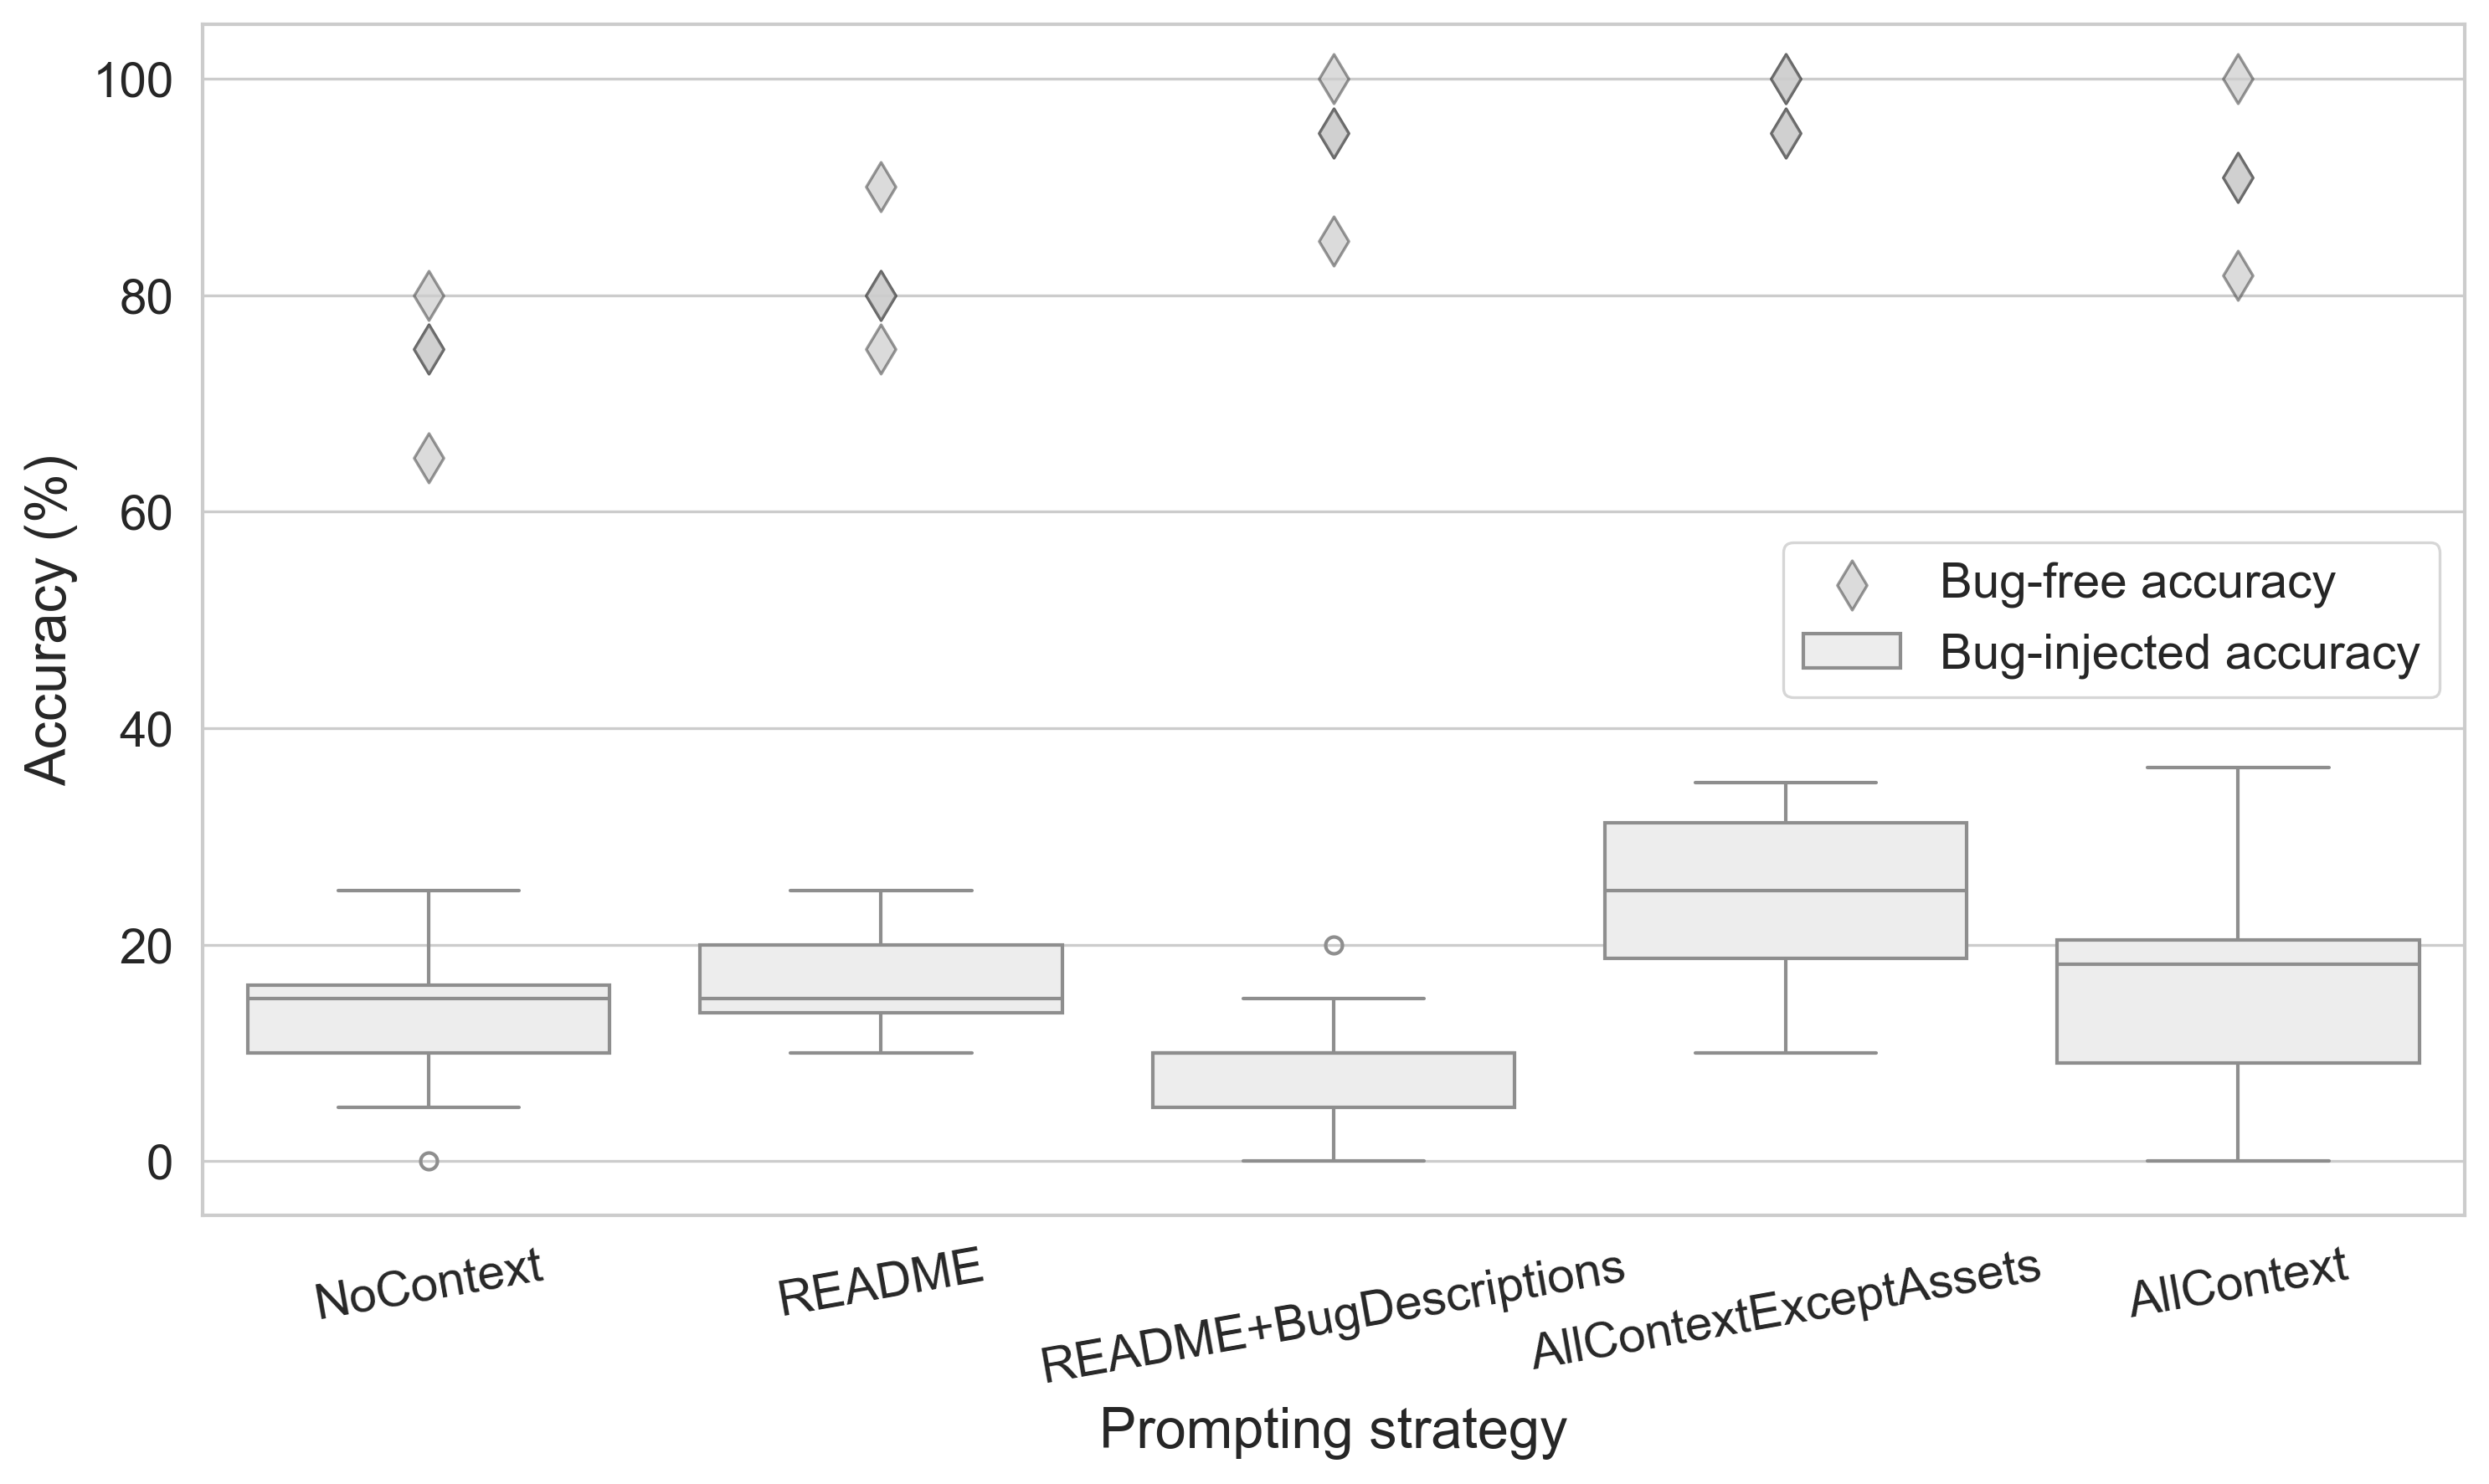

In [320]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)


sns.set_context("paper")
sns.set_style("whitegrid")

df_metrics_table_for_plotting = df_metrics_per_sample.copy(deep=True).explode(["Accuracy", "Precision", "Recall"])[["PromptingStrategy", "Sample", "Accuracy", "Precision", "Recall"]]

df_metrics_table_for_plotting["Accuracy"] = df_metrics_table_for_plotting["Accuracy"] * 100
df_metrics_table_for_plotting["Precision"] = df_metrics_table_for_plotting["Precision"] * 100
df_metrics_table_for_plotting["Recall"] = df_metrics_table_for_plotting["Recall"] * 100


sns.scatterplot(
    data=df_metrics_table_for_plotting[df_metrics_table_for_plotting["Sample"] == "clean"],
    x='PromptingStrategy',
    y='Accuracy',
    # hue='Sample',
    ax=ax,
    color=(0.8, 0.8, 0.8, 0.7),
    markers=True,
    marker="d",
    s=100,
    # dashes=None,
    # style=
    label="Bug-free accuracy",
    edgecolor=(0.2, 0.2, 0.2, 0.5),
)

sns.boxplot(
    data=df_metrics_table_for_plotting[df_metrics_table_for_plotting["Sample"] != "clean"],
    x='PromptingStrategy',
    y='Accuracy',
    # hue='Sample',
    ax=ax,
    # color='',
    label="Bug-injected accuracy"
)

ax.yaxis.set_tick_params(rotation=0, labelsize=FONTSIZE_MED)
ax.xaxis.set_tick_params(rotation=10, labelsize=FONTSIZE_MED)
plt.legend(fontsize=FONTSIZE_MED)
plt.ylabel("Accuracy (%)", fontsize=FONTSIZE_LARGE)
plt.xlabel("Prompting strategy", fontsize=FONTSIZE_LARGE)
plt.tight_layout()
# plt.show()
plt.savefig("results_main-accuracy_per_strategy.pdf", dpi=300, bbox_inches="tight")

In [257]:
df_metrics_table_for_plotting[(df_metrics_table_for_plotting["Sample"] == "clean") & (df_metrics_table_for_plotting["PromptingStrategy"] == "AllContextExceptAssets")]

,PromptingStrategy,Sample,Accuracy,Precision,Recall
15,AllContextExceptAssets,clean,95.0,0.0,0.0
15,AllContextExceptAssets,clean,100.0,0.0,0.0
15,AllContextExceptAssets,clean,100.0,0.0,0.0
15,AllContextExceptAssets,clean,95.0,0.0,0.0


In [284]:
df_metrics_table_for_plotting.groupby(["PromptingStrategy"])["Precision"].agg("median")

/var/folders/2r/t9m0nkq113v687phymh1cy6r0000gn/T/ipykernel_16694/3014643811.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metrics_table_for_plotting.groupby(["PromptingStrategy"])["Precision"].agg("median")


PromptingStrategy
NoContext                 33.333333
README                         50.0
README+BugDescriptions         50.0
AllContextExceptAssets        100.0
AllContext                83.333333
Name: Precision, dtype: object

##### Per bug-type with best strategy

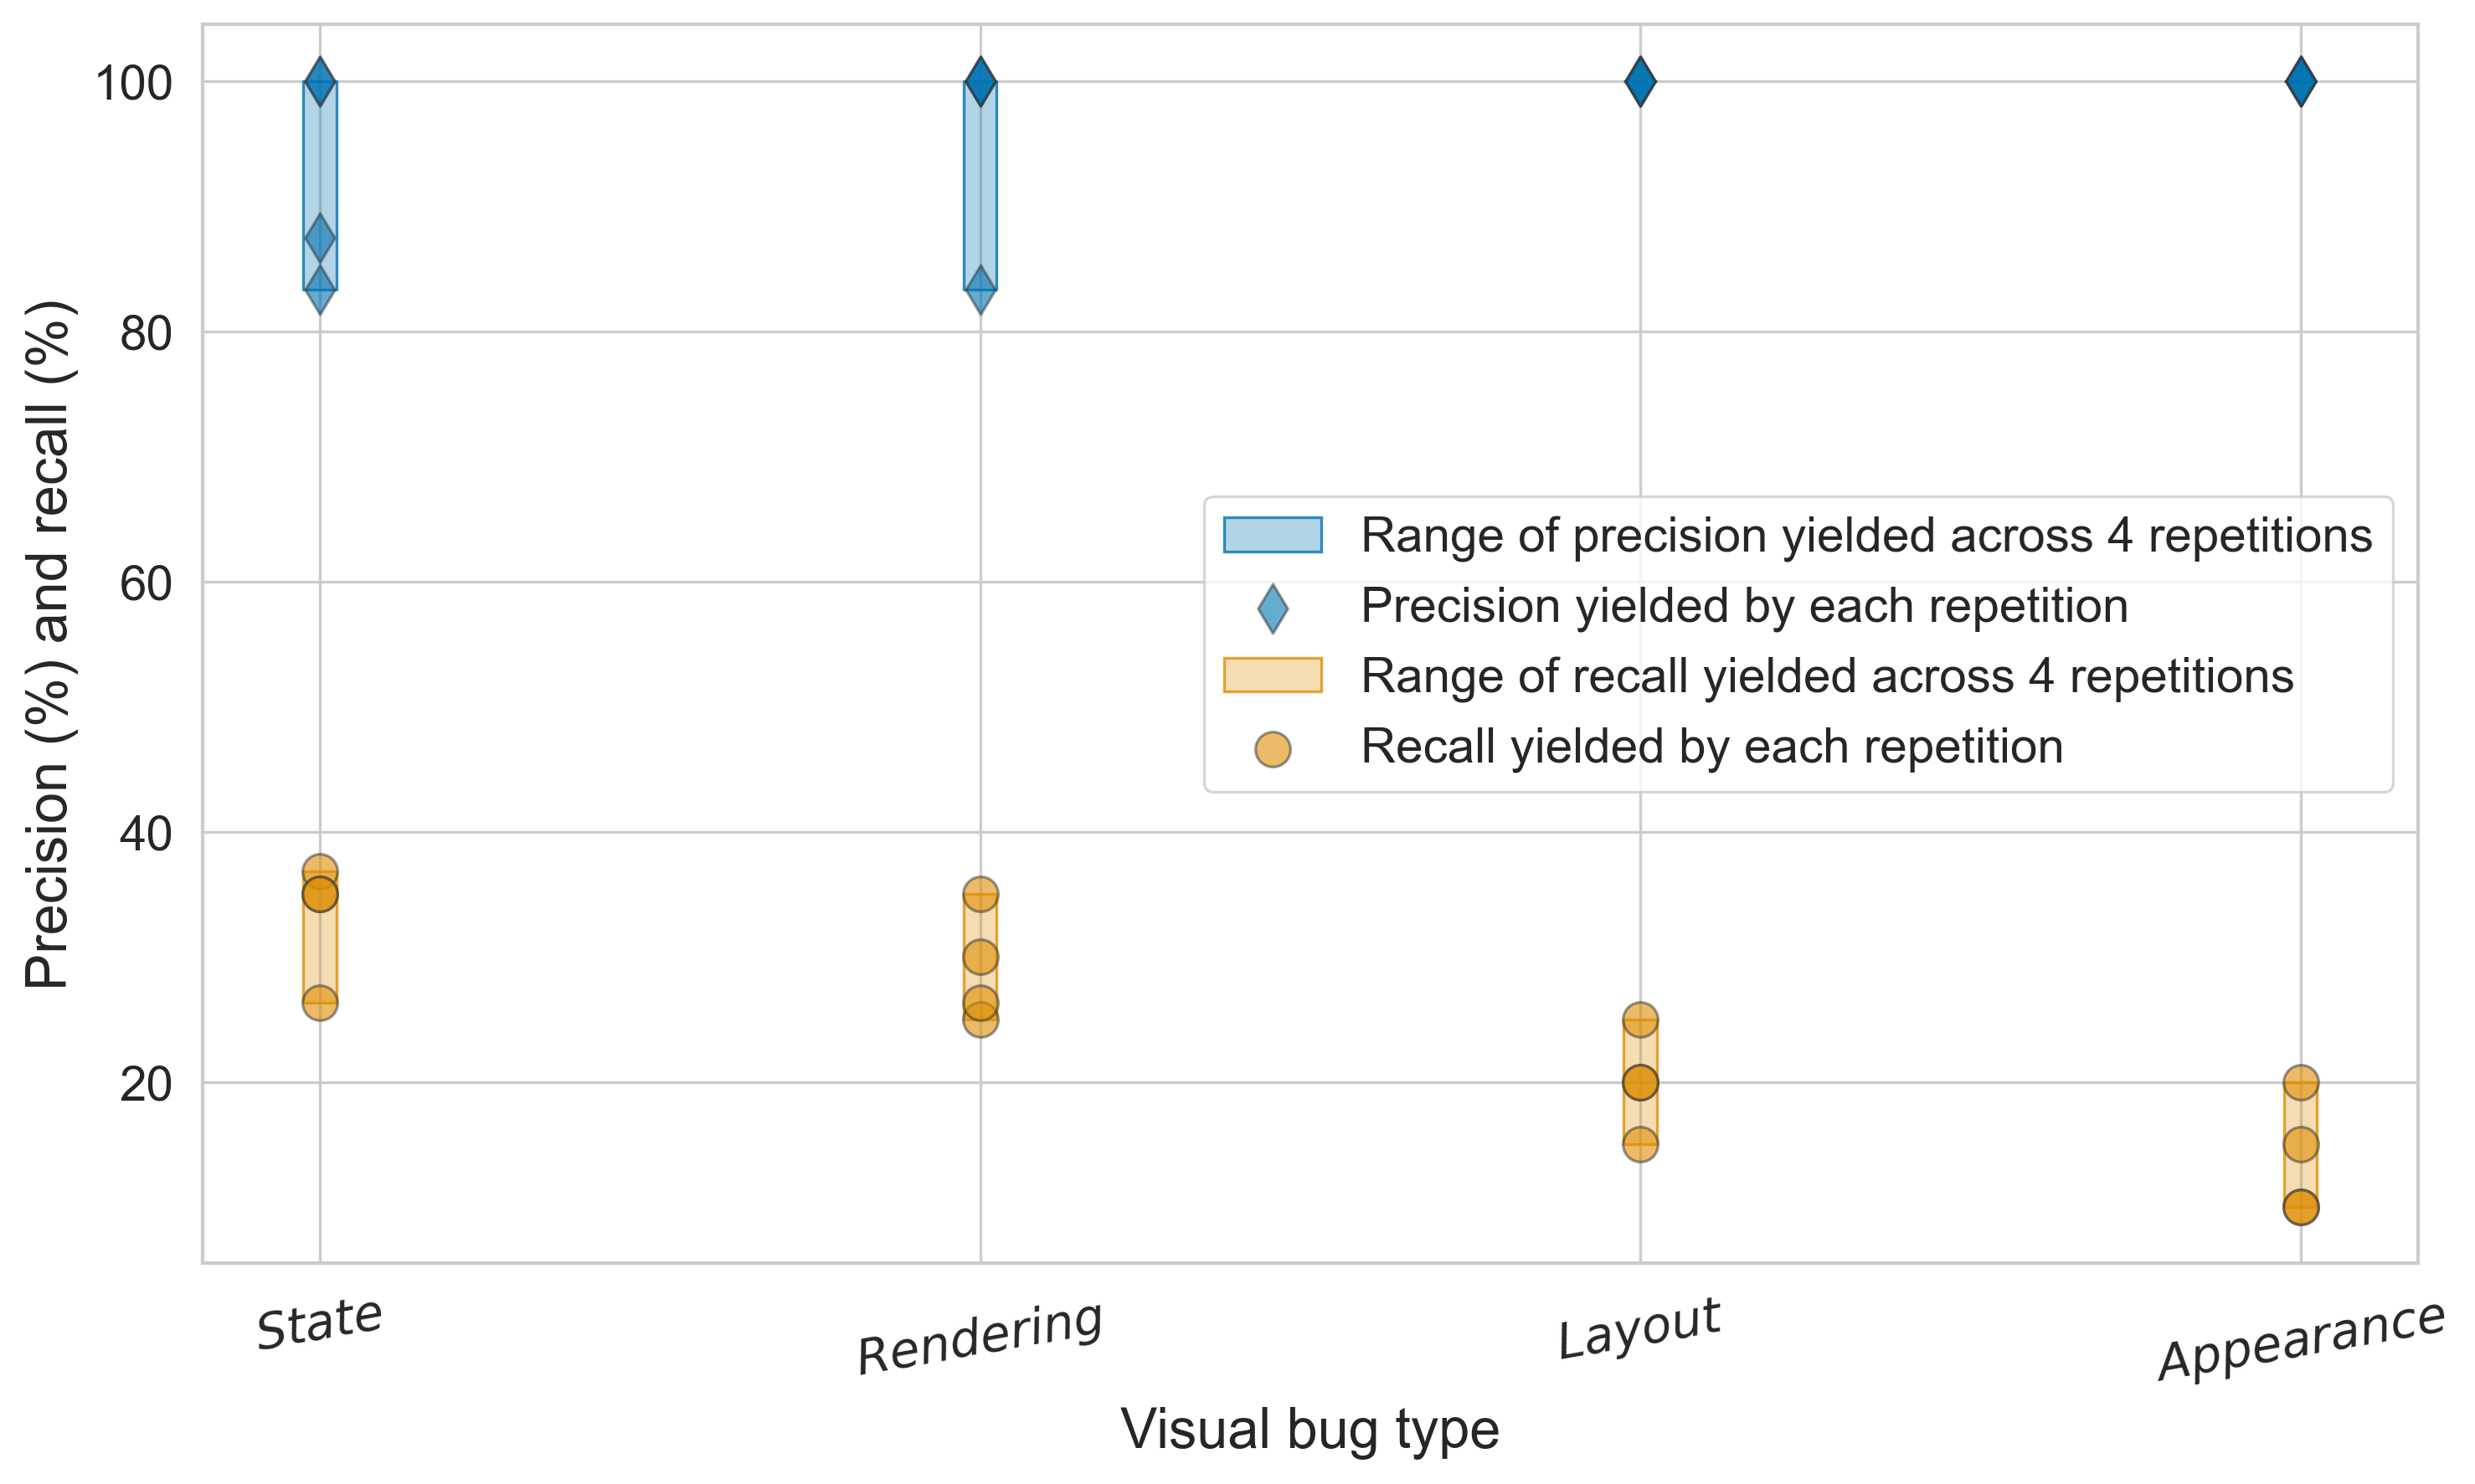

In [368]:
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

sns.set_context("paper")
sns.set_style("whitegrid")

palette = sns.color_palette("colorblind", 2)

df_metrics_table_for_plotting = df_metrics_per_sample.copy(deep=True).explode(["Accuracy", "Precision", "Recall"])[["PromptingStrategy", "Sample", "Precision", "Recall"]]

df_metrics_table_for_plotting = df_metrics_table_for_plotting[
    (df_metrics_table_for_plotting["PromptingStrategy"] == "AllContextExceptAssets")
    &
    (df_metrics_table_for_plotting["Sample"] != "clean")
]

df_metrics_table_for_plotting["Precision"] = df_metrics_table_for_plotting["Precision"] * 100
df_metrics_table_for_plotting["Recall"] = df_metrics_table_for_plotting["Recall"] * 100


df_metrics_table_for_plotting["Sample"] = df_metrics_table_for_plotting["Sample"].map(
    {
        "bug_rendering": "$\it{Rendering}$",
        "bug_appearance": "$\it{Appearance}$",
        "bug_layout": "$\it{Layout}$",
        "bug_state": "$\it{State}$",
    }
)


x_categories = df_metrics_table_for_plotting['Sample'].unique()

for i, app in enumerate(x_categories):
    subset = df_metrics_table_for_plotting[df_metrics_table_for_plotting['Sample'] == app]
    y_min = subset['Precision'].min()
    y_max = subset['Precision'].max()

    # Use fill_between to create a vertical cloud
    ax.fill_betweenx(
        y=[y_min, y_max],     # Range of y-values
        x1=i - 0.025,           # Start of the cloud (slightly offset for width)
        x2=i + 0.025,           # End of the cloud
        color=palette[0] + (0.3, ),
        edgecolor=palette[0] + (0.8, ),
        # alpha=0.2,
        label="Range of precision yielded across 4 repetitions" if i == 0 else None
    )


sns.scatterplot(
    data=df_metrics_table_for_plotting,
    x='Sample',
    y='Precision',
    # hue='Sample',
    ax=ax,
    color=palette[0] + (0.6, ),
    markers=True,
    marker="d",
    s=100,
    # dashes=None,
    # style=
    edgecolor=(0.2, 0.2, 0.2, 0.5),
    label="Precision yielded by each repetition"
)

for i, app in enumerate(x_categories):
    subset = df_metrics_table_for_plotting[df_metrics_table_for_plotting['Sample'] == app]
    y_min = subset['Recall'].min()
    y_max = subset['Recall'].max()

    ax.fill_betweenx(
        y=[y_min, y_max],     # Range of y-values
        x1=i - 0.025,           # Start of the cloud (slightly offset for width)
        x2=i + 0.025,           # End of the cloud
        color=palette[1] + (0.3, ),
        edgecolor=palette[1] + (0.8, ),
        # alpha=0.2,
        label="Range of recall yielded across 4 repetitions" if i == 0 else None
    )


sns.scatterplot(
    data=df_metrics_table_for_plotting,
    x='Sample',
    y='Recall',
    # hue='Sample',
    ax=ax,
    color=palette[1] + (0.6, ),
    markers=True,
    marker="o",
    s=100,
    # dashes=None,
    # style=
    edgecolor=(0.2, 0.2, 0.2, 0.5),
    label="Recall yielded by each repetition"
)

ax.yaxis.set_tick_params(labelsize=FONTSIZE_MED)
ax.xaxis.set_tick_params(rotation=10, labelsize=FONTSIZE_MED)
plt.legend(loc="center right", fontsize=FONTSIZE_MED)
plt.ylabel("Precision (%) and recall (%)", fontsize=FONTSIZE_LARGE)
plt.xlabel("Visual bug type", fontsize=FONTSIZE_LARGE)
plt.tight_layout()
# plt.show()
plt.savefig("results_main-precision_and_recall_per_bugtype.pdf", dpi=300, bbox_inches="tight")

In [277]:
df_metrics_per_sample.explode(["Accuracy", "Precision", "Recall"]).groupby(["PromptingStrategy", "Sample"])["Recall"].agg(["mean", "std", "max", "min", "count", "median"])

/var/folders/2r/t9m0nkq113v687phymh1cy6r0000gn/T/ipykernel_16694/3619733669.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_metrics_per_sample.explode(["Accuracy", "Precision", "Recall"]).groupby(["PromptingStrategy", "Sample"])["Recall"].agg(["mean", "std", "max", "min", "count", "median"])


mean       std       max       min  \
PromptingStrategy      Sample                                                   
NoContext              bug_appearance    0.1125  0.082916       0.2       0.0   
                       bug_layout      0.193251  0.086644    0.3125  0.117647   
                       bug_rendering   0.238542  0.034923  0.266667    0.1875   
                       bug_state        0.15625  0.070492  0.214286  0.071429   
                       clean                0.0  0.000000       0.0       0.0   
README                 bug_appearance  0.130923  0.031063  0.176471  0.111111   
                       bug_layout      0.226409  0.068389    0.3125  0.166667   
                       bug_rendering   0.183069  0.036028  0.235294  0.153846   
                       bug_state        0.25007  0.080961  0.357143  0.176471   
                       clean                0.0  0.000000       0.0       0.0   
README+BugDescriptions bug_appearance  0.027047  0.031254  0.055556       0.0   
                       bug_layout      0.090789  0.025559  0.105263  0.052632   
                       bug_rendering   0.144737  0.050391  0.210526  0.105263   
                       bug_state       0.094298  0.025975  0.111111  0.055556   
                       clean                0.0  0.000000       0.0       0.0   
AllContextExceptAssets bug_appearance    0.1375  0.047871       0.2       0.1   
                       bug_layout           0.2  0.040825      0.25      0.15   
                       bug_rendering   0.290789  0.044788      0.35      0.25   
                       bug_state       0.332895  0.047295  0.368421  0.263158   
                       clean                0.0  0.000000       0.0       0.0   
AllContext             bug_appearance  0.073232  0.089353  0.181818       0.0   
                       bug_layout      0.159091  0.155257  0.363636       0.0   
                       bug_rendering   0.186364  0.009091       0.2  0.181818   
                       bug_state            0.3  0.079253  0.363636       0.2   
                       clean                0.0  0.000000       0.0       0.0   

                                       count    median  
PromptingStrategy      Sample                           
NoContext              bug_appearance      4     0.125  
                       bug_layout          4  0.171429  
                       bug_rendering       4      0.25  
                       bug_state           4  0.169643  
                       clean               4       0.0  
README                 bug_appearance      4  0.118056  
                       bug_layout          4  0.213235  
                       bug_rendering       4  0.171569  
                       bug_state           4  0.233333  
                       clean               4       0.0  
README+BugDescriptions bug_appearance      4  0.026316  
                       bug_layout          4  0.102632  
                       bug_rendering       4  0.131579  
                       bug_state           4  0.105263  
                       clean               4       0.0  
AllContextExceptAssets bug_appearance      4     0.125  
                       bug_layout          4       0.2  
                       bug_rendering       4  0.281579  
                       bug_state           4      0.35  
                       clean               4       0.0  
AllContext             bug_appearance      4  0.055556  
                       bug_layout          4  0.136364  
                       bug_rendering       4  0.181818  
                       bug_state           4  0.318182  
                       clean               4       0.0

#### Per-app

In [219]:
# df_metrics_per_app["AppName"].isna().any()  # double check

In [225]:
df_metrics_table_for_plotting.sort_values(by=["AppName", "PromptingStrategy"])

,PromptingStrategy,AppName,Accuracy
60,AllContextExceptAssets,Aidymouse-Hexfriend,80.0
60,AllContextExceptAssets,Aidymouse-Hexfriend,80.0
60,AllContextExceptAssets,Aidymouse-Hexfriend,80.0
60,AllContextExceptAssets,Aidymouse-Hexfriend,80.0
70,AllContextExceptAssets,MichaelMakesGames-reflector,20.0
...,...,...,...
76,AllContextExceptAssets,tulustul-ants-sandbox,20.0
77,AllContextExceptAssets,uia4w-uia-wafermap,20.0
77,AllContextExceptAssets,uia4w-uia-wafermap,20.0
77,AllContextExceptAssets,uia4w-uia-wafermap,20.0


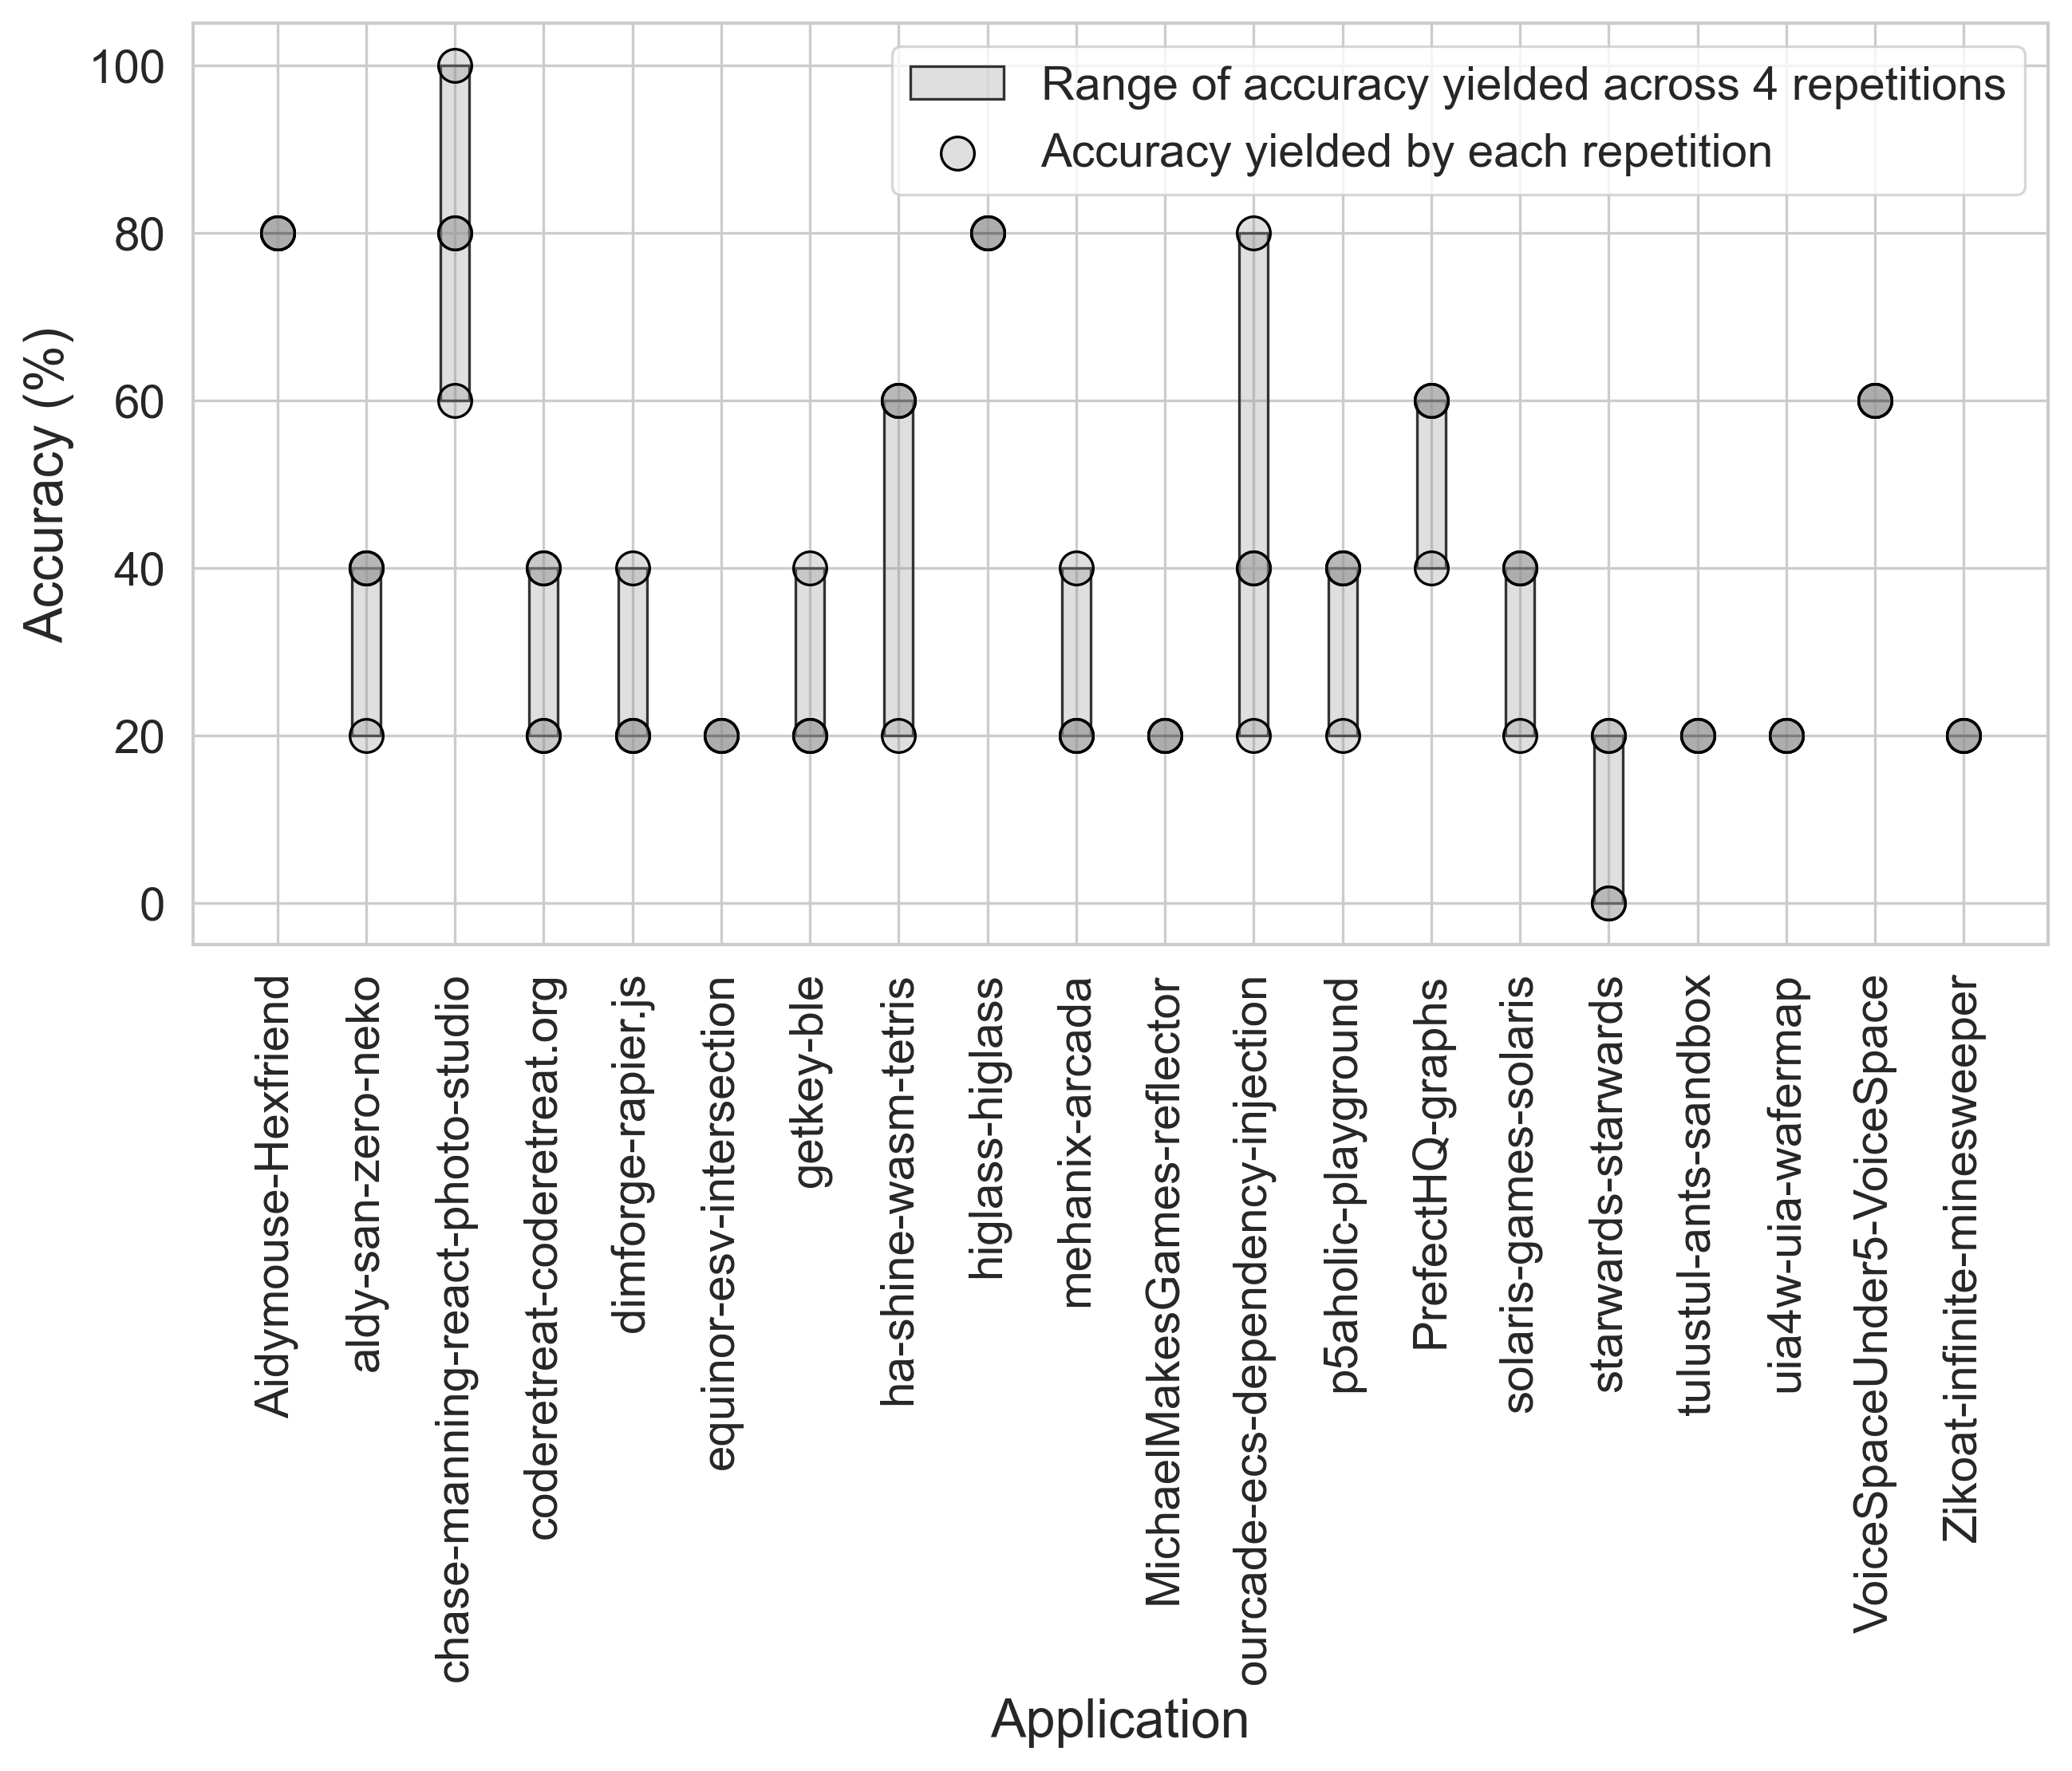

In [366]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

sns.set_context("paper")
sns.set_style("whitegrid")

palette = sns.color_palette("Greys", 1)

df_metrics_table_for_plotting = df_metrics_per_app.copy(deep=True).explode(["Accuracy", "Precision", "Recall"])[["PromptingStrategy", "AppName", "Accuracy"]]

df_metrics_table_for_plotting = df_metrics_table_for_plotting[
    (df_metrics_table_for_plotting["PromptingStrategy"] == "AllContextExceptAssets")
]

df_metrics_table_for_plotting["Accuracy"] = df_metrics_table_for_plotting["Accuracy"] * 100
df_metrics_table_for_plotting["AppName"] = df_metrics_table_for_plotting["AppName"].astype(type_app_name)
df_metrics_table_for_plotting = df_metrics_table_for_plotting.sort_values(by="AppName")
x_categories = df_metrics_table_for_plotting["AppName"].unique()

for i, app in enumerate(x_categories):
    subset = df_metrics_table_for_plotting[df_metrics_table_for_plotting['AppName'] == app]
    y_min = subset['Accuracy'].min()
    y_max = subset['Accuracy'].max()

    # Use fill_between to create a vertical cloud
    ax.fill_betweenx(
        y=[y_min, y_max],     # Range of y-values
        x1=i - 0.1625,           # Start of the cloud (slightly offset for width)
        x2=i + 0.1625,           # End of the cloud
        color=palette[0] + (0.3, ),
        edgecolor=(0.2, 0.2, 0.2),
        # alpha=0.2,
        label="Range of accuracy yielded across 4 repetitions" if i == 0 else None
    )

sns.scatterplot(
    data=df_metrics_table_for_plotting,
    x='AppName',
    y='Accuracy',
    # hue='Sample',
    ax=ax,
    color=palette[0] + (0.3, ),
    markers=True,
    marker="o",
    s=100,
    # dashes=None,
    # style=
    edgecolor="black",
    label="Accuracy yielded by each repetition"
)

# ax.grid(False, which="major", axis="x")
# ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.7, alpha=0.7)
ax.yaxis.set_tick_params(labelsize=FONTSIZE_MED)
ax.xaxis.set_tick_params(rotation=90, labelsize=FONTSIZE_MED)
plt.legend(fontsize=FONTSIZE_MED)
plt.ylabel("Accuracy (%)", fontsize=FONTSIZE_LARGE)
plt.xlabel("Application", fontsize=FONTSIZE_LARGE)
# plt.tight_layout()
# plt.show()
plt.savefig("results_main-accuracy_per_app.pdf", dpi=300, bbox_inches="tight")

#### pass@k -- (skip, plot isn't very meaningful, table is better)

In [ ]:
# melted_df = df_pass_at_k.melt(
#     id_vars=['PromptingStrategy', 'Sample', 'AppName'],
#     value_vars=['Pass@1', 'Pass@2', 'Pass@3', 'Pass@4'],
#     var_name='PassMetric',
#     value_name='Value'
# )

# melted_df['k'] = melted_df['PassMetric'].str.extract('(\d+)').astype(int)

# # Group by PromptingStrategy and k, and calculate mean, min, and max
# # grouped = melted_df.groupby(['PromptingStrategy', 'k'])['Value'].agg(['mean', 'min', 'max']).reset_index()
# grouped = melted_df.groupby(['PromptingStrategy', 'k'])['Value'].agg(['mean', 'std']).reset_index()

# # Plot
# plt.figure(figsize=(10, 6))
# for strategy, data in grouped.groupby('PromptingStrategy'):
#     plt.plot(data['k'], data['mean'], marker='o', label=f'{strategy} (Mean)')
#     # plt.fill_between(data['k'], data['min'], data['max'], alpha=0.2, label=f'{strategy} (Min-Max)')
#     plt.fill_between(data['k'],
#                  data['mean'] - data['std'],
#                  data['mean'] + data['std'],
#                 alpha=0.2, label=f'{strategy} (Std Dev)')

# # Formatting
# plt.title('Pass@k by Prompting Strategy')
# plt.xlabel('Pass@k')
# plt.ylabel('Value')
# plt.xticks(grouped['k'].unique(), labels=[f'Pass@{k}' for k in grouped['k'].unique()])
# plt.legend()
# plt.grid(True)
# plt.tight_layout()

# plt.show()


### Per-app results -- Differences across prompting strategies

#### Look at per-app differences in metrics -- for ablation study (see `./Ablation.ipynb`)


In [35]:
# df_metrics_per_app[df_metrics_per_app["PromptingStrategy"] == "NoContext"].groupby("AppName").count()

In [36]:
# df_metrics_per_app[(df_metrics_per_app["PromptingStrategy"] == "NoContext") & (df_metrics_per_app["AppName"] == "dimforge-rapier.js")]

In [37]:
# df_results_compiled[(df_results_compiled["TextAppName"] == "dimforge-rapier.js") & (df_results_compiled["IntRunNumber"] == 5)] # & (df_results_compiled[])]

In [38]:
# df_results_compiled[(df_results_compiled["TextAppName"] == "chase-manning-react-photo-studio") & (df_results_compiled["IntRunNumber"] == 2)] # & (df_results_compiled[])]

In [39]:
# df_metrics_per_app[df_metrics_per_app["PromptingStrategy"] == "NoContext"].groupby("AppName").count()
# # df_metrics_per_app[df_metrics_per_app["PromptingStrategy"] == "NoContext" & df_metrics_per_app["Recall"].isna()].groupby("AppName").count()

# df_metrics_per_app[(df_metrics_per_app["PromptingStrategy"] == "NoContext") & (df_metrics_per_app["AppName"] == "chase-manning-react-photo-studio")]

In [40]:
def get_average_metric_values_per_strategy(
        df_in,
        name_of_strategy="NoContext",
        name_of_metric="Recall"
    ):
    return df_in[df_in["PromptingStrategy"] == name_of_strategy].sort_values(
        by=["AppName", "Iteration"]
    ).reset_index(
        drop=True
    ).groupby(
        "AppName"
    )[name_of_metric].mean()

vals_recall_nocontext = get_average_metric_values_per_strategy(df_metrics_per_app, "NoContext", "Recall")
vals_precision_nocontext = get_average_metric_values_per_strategy(df_metrics_per_app, "NoContext", "Precision")

vals_recall_readme = get_average_metric_values_per_strategy(df_metrics_per_app, "README", "Recall")
vals_precision_readme = get_average_metric_values_per_strategy(df_metrics_per_app, "README", "Precision")

(vals_recall_readme - vals_recall_nocontext).sort_values(ascending=False)

# vals_precision_readme - vals_precision_nocontext

AppName
VoiceSpaceUnder5-VoiceSpace         0.291667
chase-manning-react-photo-studio    0.166667
starwards-starwards                 0.125000
aldy-san-zero-neko                  0.083333
Aidymouse-Hexfriend                 0.083333
Zikoat-infinite-minesweeper         0.083333
MichaelMakesGames-reflector         0.062500
uia4w-uia-wafermap                  0.062500
solaris-games-solaris               0.062500
PrefectHQ-graphs                    0.020833
dimforge-rapier.js                  0.000000
tulustul-ants-sandbox               0.000000
ourcade-ecs-dependency-injection    0.000000
mehanix-arcada                     -0.041667
coderetreat-coderetreat.org        -0.062500
getkey-ble                         -0.062500
p5aholic-playground                -0.125000
higlass-higlass                    -0.208333
ha-shine-wasm-tetris               -0.270833
equinor-esv-intersection                 NaN
Name: Recall, dtype: float64

Top 3 positive mean recall diffs (applications) when using README as context:
1. `VoiceSpaceUnder5-VoiceSpace      (+0.29)`
2. `chase-manning-react-photo-studio (+0.17)`
3. `starwards-starwards              (+0.13)`

Bottom 3 negative mean recall diffs (applications) when using README as context:
1. `ha-shine-wasm-tetris         (-0.27)`
2. `higlass-higlass              (-0.21)`
3. `p5aholic-playground          (-0.13)`

--> Use these applications in the Ablation study (see experiments in `../2-Experiments/run_ablation.sh` and results in `./Ablation.ipynb`)

### Calculate README lengths

In [91]:
def read_file_and_count_tokens(path_to_file):
    # read file
    with open(path_to_file, "r") as f:
        content = f.read()

        # count tokens with tiktoken (gpt-4o tokenizer)
        encoding = tiktoken.encoding_for_model("gpt-4o-2024-08-06")
        tokens = encoding.encode(content)

    return len(tokens)

In [92]:
path_to_external_repos = Path("../../vlm_canvas_bugs-external_repos/")

dict_num_tokens_original_readmes = {}

for path_to_repo in [ptr for ptr in path_to_external_repos.iterdir() if ptr.is_dir()]:

    name_of_app = path_to_repo.name

    if name_of_app not in app_names:
        continue

    print(f"Processing {name_of_app}...")

    dict_num_tokens_original_readmes[name_of_app] = 0

    for path_to_file in path_to_repo.resolve().rglob("README.md"):

        if "node_modules" in str(path_to_file):
            continue

        # print(f"    Found README.md at {path_to_file}")
        num_tokens = read_file_and_count_tokens(path_to_file)
        dict_num_tokens_original_readmes[name_of_app] += num_tokens

dict_num_tokens_rounded_original_readmes = {}

for key in dict_num_tokens_original_readmes.keys():
    dict_num_tokens_rounded_original_readmes[key] =  np.round(dict_num_tokens_original_readmes[key], -1)

dict_num_tokens_rounded_original_readmes

Processing equinor-esv-intersection...
Processing ha-shine-wasm-tetris...
Processing Zikoat-infinite-minesweeper...
Processing getkey-ble...
Processing PrefectHQ-graphs...
Processing Aidymouse-Hexfriend...
Processing aldy-san-zero-neko...
Processing higlass-higlass...
Processing coderetreat-coderetreat.org...
Processing MichaelMakesGames-reflector...
Processing mehanix-arcada...
Processing p5aholic-playground...
Processing solaris-games-solaris...
Processing VoiceSpaceUnder5-VoiceSpace...
Processing dimforge-rapier.js...
Processing uia4w-uia-wafermap...
Processing starwards-starwards...
Processing tulustul-ants-sandbox...
Processing ourcade-ecs-dependency-injection...
Processing chase-manning-react-photo-studio...


{'equinor-esv-intersection': np.int64(1410),
 'ha-shine-wasm-tetris': np.int64(290),
 'Zikoat-infinite-minesweeper': np.int64(350),
 'getkey-ble': np.int64(280),
 'PrefectHQ-graphs': np.int64(300),
 'Aidymouse-Hexfriend': np.int64(490),
 'aldy-san-zero-neko': np.int64(590),
 'higlass-higlass': np.int64(2010),
 'coderetreat-coderetreat.org': np.int64(1490),
 'MichaelMakesGames-reflector': np.int64(140),
 'mehanix-arcada': np.int64(760),
 'p5aholic-playground': np.int64(170),
 'solaris-games-solaris': np.int64(1010),
 'VoiceSpaceUnder5-VoiceSpace': np.int64(2420),
 'dimforge-rapier.js': np.int64(1560),
 'uia4w-uia-wafermap': np.int64(1740),
 'starwards-starwards': np.int64(1430),
 'tulustul-ants-sandbox': np.int64(130),
 'ourcade-ecs-dependency-injection': np.int64(260),
 'chase-manning-react-photo-studio': np.int64(400)}

In [93]:
(df_tokens_per_app_readme_original := pd.DataFrame.from_dict(
    dict_num_tokens_rounded_original_readmes,
    orient="index"
).sort_values(
    by=0,
    ascending=False
).rename(
    {0: "NumTokensInREADMEs"},
    axis=1)
)

,NumTokensInREADMEs
VoiceSpaceUnder5-VoiceSpace,2420
higlass-higlass,2010
uia4w-uia-wafermap,1740
dimforge-rapier.js,1560
coderetreat-coderetreat.org,1490
starwards-starwards,1430
equinor-esv-intersection,1410
solaris-games-solaris,1010
mehanix-arcada,760
aldy-san-zero-neko,590


In [94]:
path_to_ablated_readmes = Path("../Data/2-Experiments/ablated_readmes/")

dict_num_tokens_ablated_readmes = {}

for path_to_file in path_to_ablated_readmes.glob("informative/**/README.md"):
    num_tokens = read_file_and_count_tokens(path_to_file)
    dict_num_tokens_ablated_readmes[f"{path_to_file.parent.name}(GOOD)"] = num_tokens


for path_to_file in path_to_ablated_readmes.glob("distracting/**/README.md"):
    num_tokens = read_file_and_count_tokens(path_to_file)
    dict_num_tokens_ablated_readmes[f"{path_to_file.parent.name}(BAD)"] = num_tokens

dict_num_tokens_ablated_readmes_rounded = {}

for key in dict_num_tokens_ablated_readmes.keys():
    dict_num_tokens_ablated_readmes_rounded[key] = np.round(dict_num_tokens_ablated_readmes[key], -1)


In [95]:
(df_tokens_per_app_readme_ablated := pd.DataFrame.from_dict(
    dict_num_tokens_ablated_readmes_rounded,
    orient="index"
).sort_values(
    by=0,
    ascending=False
).rename(
    {0: "NumTokensInREADMEs"},
    axis=1)
)

,NumTokensInREADMEs
VoiceSpaceUnder5-VoiceSpace(BAD),2320
higlass-higlass(BAD),1880
starwards-starwards(BAD),1250
chase-manning-react-photo-studio(BAD),360
p5aholic-playground(BAD),170
higlass-higlass(GOOD),130
VoiceSpaceUnder5-VoiceSpace(GOOD),120
starwards-starwards(GOOD),110
ha-shine-wasm-tetris(BAD),80
chase-manning-react-photo-studio(GOOD),20


In [375]:
(df_tokens_per_app_readme := pd.concat([df_tokens_per_app_readme_original, df_tokens_per_app_readme_ablated]).sort_index())

,NumTokensInREADMEs
Aidymouse-Hexfriend,490
MichaelMakesGames-reflector,140
PrefectHQ-graphs,300
VoiceSpaceUnder5-VoiceSpace,2420
VoiceSpaceUnder5-VoiceSpace(BAD),2320
VoiceSpaceUnder5-VoiceSpace(GOOD),120
Zikoat-infinite-minesweeper,350
aldy-san-zero-neko,600
chase-manning-react-photo-studio,410
chase-manning-react-photo-studio(BAD),360


In [381]:
print("Max of original READMEs")
df_tokens_per_app_readme_original.max()

Max of original READMEs


NumTokensInREADMEs    2420
dtype: int64

In [382]:
print("Min of original READMEs")
df_tokens_per_app_readme_original.min()

Min of original READMEs


NumTokensInREADMEs    130
dtype: int64

--> original READMEs length supplied per app ranges from 130 to 2420 tokens.

In [383]:
print("Max of ablated READMEs")
df_tokens_per_app_readme_ablated.max()

Max of ablated READMEs


NumTokensInREADMEs    2320
dtype: int64

In [384]:
print("Min of ablated READMEs")
df_tokens_per_app_readme_ablated.min()

Min of ablated READMEs


NumTokensInREADMEs    0
dtype: int64

--> ablated READMEs length supplied per app ranges from 0 to 2320 tokens.